In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import sph_harm
from scipy.io import loadmat

def cartesian2spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def spherical2cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def spherical_harmonic(pos, ord, deg):
    x,y,z = pos[0], pos[1], pos[2]
    r, theta, phi = cartesian2spherical(x, y, z)
    return sph_harm(ord, deg, phi, theta)*r**ord

In [2]:
data_coil_trace = loadmat('data_coil_trace.mat')
coil_trace = [np.asarray(data_coil_trace['data_coil_trace'][i][0]) for i in range(29)]
norm_active_shim_result = loadmat('norm_particleswarm_results.mat')
std_active_shim_result = loadmat('std_particleswarm_results.mat')
X,Y,Z = loadmat("B0_map_valid.mat")['X'], loadmat("B0_map_valid.mat")['Y'], loadmat("B0_map_valid.mat")['Z']
pos = np.vstack([X,Y,Z])
print(pos.shape)

B0_no_shim = norm_active_shim_result['B0_no_shim']
B0_system_shim = std_active_shim_result['B0_shim']
B0_active_shim_L2 = norm_active_shim_result['B0_active_shim']
B0_active_shim_std = std_active_shim_result['B0_active_shim']

print(B0_no_shim.shape, B0_system_shim.shape, B0_active_shim_L2.shape, B0_active_shim_std.shape)

(3, 620785)
(1, 620785) (1, 620785) (1, 620785) (1, 620785)


/home/honght/miniconda3/envs/NUMERICAL/lib/python3.7/site-packages/matplotlib/axes/_axes.py:4192: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


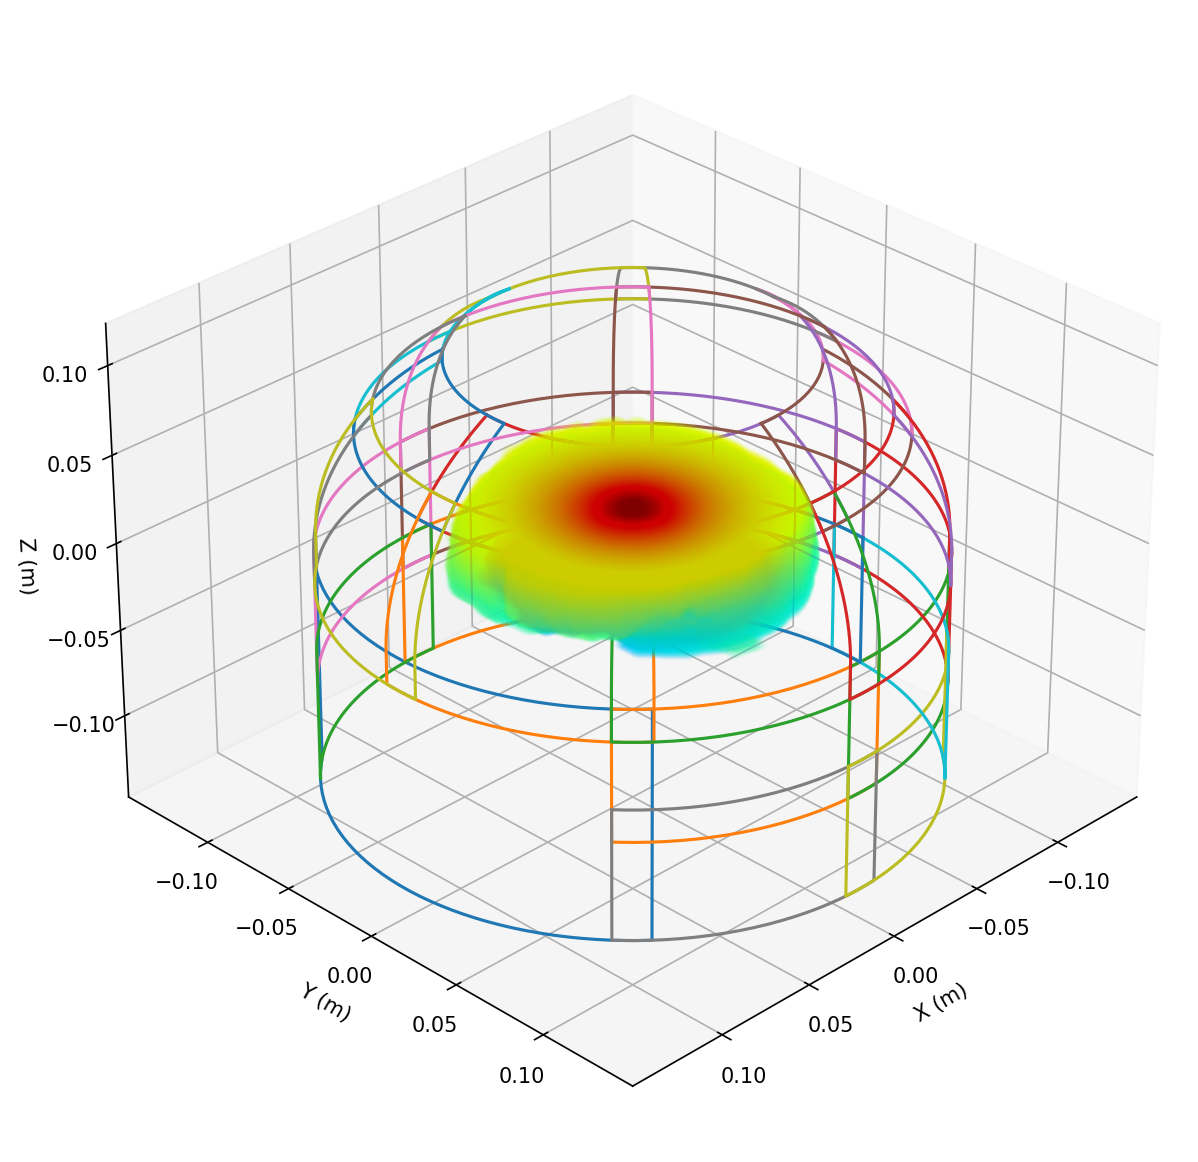

In [3]:
R_00 = spherical_harmonic(pos, 0, 0)
R_01 = spherical_harmonic(pos, 0, 1)
R_11 = spherical_harmonic(pos, 1, 1)
R_02 = spherical_harmonic(pos, 0, 2)
R_12 = spherical_harmonic(pos, 1, 2)
R_22 = spherical_harmonic(pos, 2, 2)

alpha_01 = R_01/np.max(np.abs(R_01))
alpha_11 = R_11/np.max(np.abs(R_11))
alpha_02 = R_02/np.max(np.abs(R_02))
alpha_12 = R_12/np.max(np.abs(R_12))
alpha_22 = R_22/np.max(np.abs(R_22))

fig = plt.figure(dpi=150,figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=alpha_01*512, cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
plt.show()